# ADA final exam (winter semester 2019/2020)

A friend of yours wants to start a YouTube channel and ideally earn some money via ads. However, there are so many channels and videos out there that your friend has no idea where to even start. Fortunately, they know that you have taken ADA and think you might help them out by analyzing the videos that are currently on YouTube.

The data you are provided with is a subset of YouTube videos, with videos from some of the giant channels in two categories: "Gaming" and "How-to & Style", which are the categories your friend is choosing between. The dataset contains a lot of videos, with data on those videos including their titles, their total number of views in 2019, their tags and descriptions, etc. The data is, in gzip-compressed format, contained in the `data/` folder, as the file `youtube.csv.gz`.

The three tasks A, B and C are **independent** of each other, and you can solve any combination of them. The exam is designed for more than 3 hours, so don't worry if you don't manage to solve everything; you can still score a 6.

You need to run the following two cells to read and prepare the dataset.

In [3]:
import pandas as pd
import numpy as np

In [4]:
youtube = pd.read_csv('data/youtube.csv.gz', compression='gzip')
youtube.upload_date = pd.to_datetime(youtube.upload_date)

## Dataset description

Each row of the dataset corresponds to one video that was uploaded to YouTube. There are 11 columns:
'channel', 'upload_date', 'title', 'categories', 'tags', 'duration',
       'view_count', 'average_rating', 'height', 'width', 'channel_cat'.
- `channel`: The channel (account) on which the video was uploaded.
- `upload_date`: The date on which the video was uploaded (Pandas Timestamp object).
- `title`: The title of the video.
- `tags`: A list of words that describe the video.
- `duration`: The duration of the video in seconds.
- `view_count`: The number of times the video was watched.
- `average_rating`: The average score with which the viewers rated the video (1-5).
- `height`: The height of the video in pixels.
- `width`: The width of the video in pixels.
- `channel_cat`: The category of the channel on which this video was uploaded. This dataset only contains videos from channels from the 'Gaming' and the 'Howto & Style' category.

# Task A: Welcome to the exam!

All of Task A refers to the videos that were published between and including 2010 and 2018.

## A1: A growing platform?

You would first like to know whether YouTube in general is the right platform to invest time into.

1. Using the appropriate plot type, plot the number of videos published per year between and including 2010 and 2018.

In [3]:
# First, we inspect the data:
youtube.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.0,2541550.0,4.886102,720.0,1280.0,Gaming
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.0,1727646.0,4.951531,720.0,1280.0,Gaming
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.0,1402747.0,4.962706,720.0,1280.0,Gaming
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.0,4348296.0,4.937665,720.0,1280.0,Gaming
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.0,1410659.0,4.957545,720.0,1280.0,Gaming


In [143]:
# Then, we search for NaN values:
print(youtube.notna().sum())
print(len(youtube))

channel           139507
upload_date       139507
title             139507
tags              139507
duration          139507
view_count        139507
average_rating    139507
height            139507
width             139507
channel_cat       139507
dtype: int64
139507


139507
127863


Text(0.5, 0, 'Years')

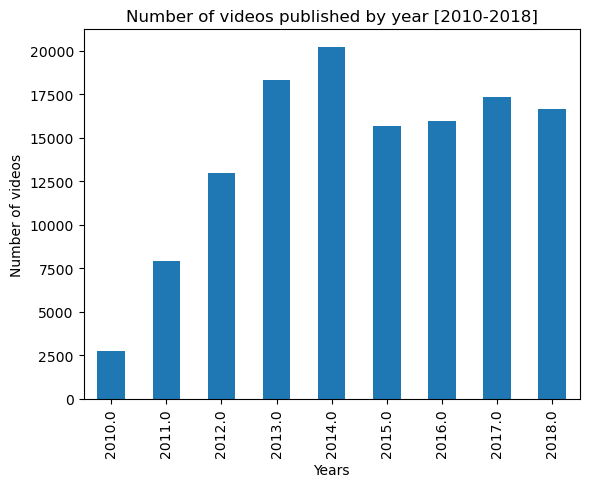

In [151]:
# First, we select the correct time range: 
years = youtube['upload_date'].dt.year
print(len(years))
years = years.loc[years.apply(lambda x: x>=2010 and x <= 2018)]
print(len(years))
# Then, we produce the barplot:
import matplotlib.pyplot as plt
plot = youtube.groupby(years)['title'].count().plot(kind='bar', title = 'Number of videos published by year [2010-2018]')
plot.set_ylabel('Number of videos')
plot.set_xlabel('Years')

2. Now for each year, plot the number of channels that have been created between the beginning of 2010 and the end of that year. A channel is considered to be created at the time at which they upload their first video.

In [451]:
# First, we select the corresponding years and sort the upload_date, to keep only the first mention of channel creation (uploading of the first video), each video being one row:
channels = youtube.loc[(youtube.upload_date.dt.year <= 2018) & (youtube.upload_date.dt.year >= 2010),['upload_date','channel']].sort_values("upload_date", ascending = True)
channels = channels.drop_duplicates(subset = ['channel'], keep='first') # Here, really precise the subset otherwise it does not take the column into account !!
channels.head(5) # here, we keep only once the name of a channel from the first time it appears in the publication dates

,upload_date,channel
95637,2010-01-01,ATHLEAN-X™
131744,2010-01-01,Wayne Goss
55566,2010-01-01,SeaNanners Gaming Channel
125321,2010-01-01,ThreadBanger
130764,2010-01-02,Ingrid Nilsen


In [ ]:
# Careful, just filtering by years does not allow to remove channels created before 2010!!!

In [440]:
# Alternative with less channels:
new_channels = youtube[~youtube.channel.isin(youtube.channel[youtube.upload_date < np.datetime64('2010-01-01')].unique())]
new_channels.sort_values('upload_date', ascending=True).drop_duplicates(subset=['channel'], keep='first')

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
105128,dope2111,2010-01-12,Avatar Make-up !!!!(Neytiri),[],88.0,2181256.0,4.764856,480.0,640.0,Howto & Style
134894,Laura in the Kitchen,2010-01-17,Molten Chocolate Lava Cake Recipe - Laura Vita...,"['to', 'how', 'recipe', 'cooking', 'easy', 'ki...",567.0,927540.0,4.663537,480.0,640.0,Howto & Style
139505,cutepolish,2010-02-20,Easy Plaid Nails,"['easy', 'makeup', 'beauty', 'fashion']",174.0,247053.0,4.855700,480.0,640.0,Howto & Style
112055,SixPackAbs.com,2010-03-01,How To Get A Six Pack - With Six Pack Shortcut...,['fitness'],659.0,1658673.0,4.461918,240.0,320.0,Howto & Style
20880,theRadBrad,2010-04-07,Modern Warfare 2: theRadBrad's Random Clips,"['Gameplay', 'Commentary', 'of']",133.0,20394.0,4.939164,720.0,1280.0,Gaming
...,...,...,...,...,...,...,...,...,...,...
88635,5-Minute Crafts PLAY,2017-11-08,9 PLANT DIYs KIDS WILL LOVE TO MAKE,"['5-Minute Crafts', 'DIY', 'Do it yourself', '...",397.0,17385.0,4.874126,1080.0,1920.0,Howto & Style
63332,Daequan Loco,2017-11-18,Solo vs. SQUAD Win - 18 Kills Fortnite Battle ...,"['fortnite', 'pvp']",776.0,220201.0,4.958050,720.0,1280.0,Gaming
91987,Crafty Panda,2017-12-15,7 Amazing DIY Christmas Decorations Made From ...,"['diy', 'how to']",141.0,95194.0,4.833223,1080.0,1920.0,Howto & Style
86285,5-Minute Crafts GIRLY,2018-01-23,20 EASY CAR DRIVING HACKS FOR WOMEN,"['5-Minute Crafts', 'DIY', 'Do it yourself', '...",799.0,6813.0,4.441176,1080.0,1920.0,Howto & Style


In [423]:
# Then, we count the cumulative number of channels per year :
channels_count = channels.groupby(channels.upload_date.dt.year).count()+ \
            pd.DataFrame(data={'channel': [0]*(2018-2010+1), 
            'upload_year':list(range(2010,2018+1))}).set_index('upload_year')
channels_count = channels_count.fillna(0).cumsum().drop(columns="upload_date")
channels_count

,channel
upload_date,
2010,49
2011,76
2012,112
2013,133
2014,151
2015,164
2016,176
2017,193
2018,195


Text(0.5, 0, 'Years')

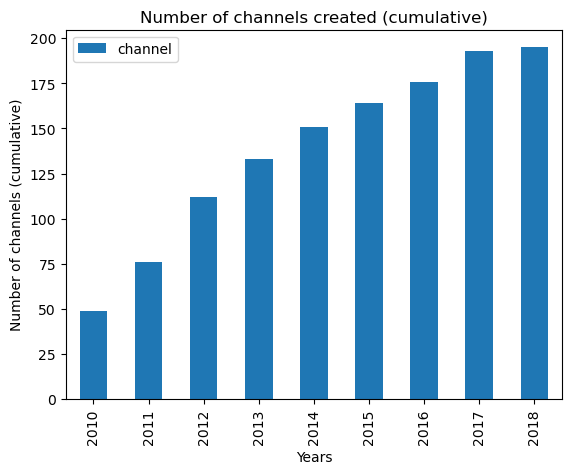

In [424]:
# For each year, we now plot the cumulative number of channels created between 2010 and the end of this year:
plot = channels_count.plot(kind='bar', title = "Number of channels created (cumulative)")
plot.set_ylabel('Number of channels (cumulative)')
plot.set_xlabel('Years')

3. Normalize the number of videos published each year by the number of channels that have been created between the beginning of 2010 and the end of that year, and plot these quantities. Do separate plots for gaming channels, how-to channels, and both together. Can you conclude from the plot that both gaming and how-to channels have been becoming less and less active recently? Why, or why not?

In [147]:
# Normalizing number of videos per year with number of channels created btw 2010 and this year:
# For all categories:
videos = youtube.groupby(years)['title'].count()
normalized_all_cat = videos/channels_count.channel
normalized_all_cat

upload_date
2010.0     55.734694
2011.0    104.328947
2012.0    115.955357
2013.0    137.661654
2014.0    133.880795
2015.0     95.756098
2016.0     90.715909
2017.0     89.927461
2018.0     85.461538
dtype: float64

In [173]:
# Separate between both channel categories:
videos_gaming = youtube.loc[(youtube.upload_date.dt.year <= 2018) & (youtube.upload_date.dt.year >= 2010) & (youtube.channel_cat == 'Gaming'), ['upload_date', 'title']]
videos_howto = youtube.loc[(youtube.upload_date.dt.year <= 2018) & (youtube.upload_date.dt.year >= 2010) & (youtube.channel_cat == 'Howto & Style'), ['upload_date', 'title']]

In [175]:
# Again, we groupby year and count the number of videos:
videos_gaming = videos_gaming.groupby(youtube.upload_date.dt.year)['title'].count()
videos_howto = videos_howto.groupby(youtube.upload_date.dt.year)['title'].count()

In [176]:
# Normalize:
normalized_gaming = videos_gaming/channels_count.channel
normalized_howto = videos_howto/channels_count.channel

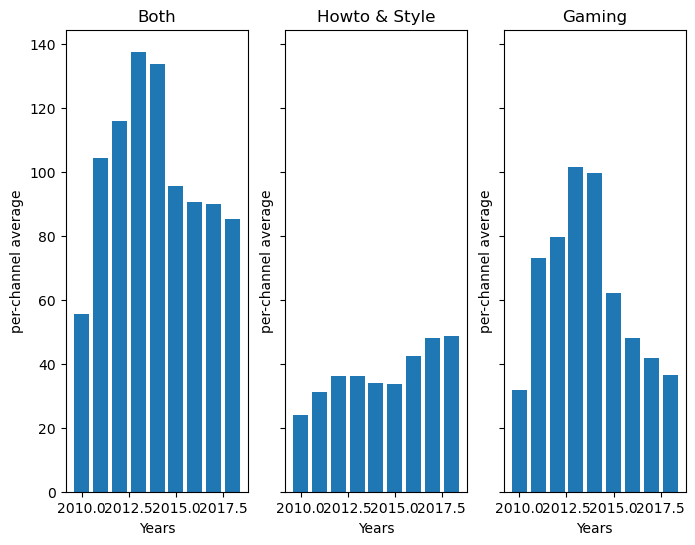

In [179]:
fig, ax = plt.subplots(1,3,figsize= (8,6), sharey = True, sharex = True)
ax[0].bar(x=normalized_all_cat.index, height = normalized_all_cat)
ax[0].set_title("Both")

ax[1].bar(x=normalized_howto.index, height = normalized_howto)
ax[1].set_title("Howto & Style")

ax[2].bar(x=normalized_gaming.index, height = normalized_gaming)
ax[2].set_title("Gaming")

for i in range(3):
    ax[i].set_ylabel('per-channel average')
    ax[i].set_xlabel('Years')

Together, it seems that activity has decreased through recent years but looking at individual categories we can see that Howto & Style increased the videos number while gaming activity has dropped in recent years.

## A2: The one thing we all love: cash money

Your friend is really keen on making money from their YouTube channel through ads and wants you to help them choose the most profitable channel category (Gaming or Howto & Style). The ad profit is directly proportional to the number of views of a video.

1. Since your friend wants to keep producing videos for several years to come, it might also be worth looking at the growth of the two categories.
  1. Compute the total number of views in each category per year for the years 2010-2018.
  2. Divide the yearly view count by the number of channels that posted a video in each category in each year. Plot these normalized counts.




In [5]:
# 1. 
youtube.loc[youtube.channel_cat == 'Gaming'].view_count.sum()

135986429274.0

In [6]:
# 1. 
youtube.loc[youtube.channel_cat == 'Howto & Style'].view_count.sum()

86493243255.0

In [21]:
# 2. total number of views in each category per year:
views_gaming = youtube.loc[(youtube.upload_date.dt.year <= 2018) & (youtube.upload_date.dt.year >= 2010) & (youtube.channel_cat == 'Gaming'), ['upload_date', 'view_count']]
views_howto = youtube.loc[(youtube.upload_date.dt.year <= 2018) & (youtube.upload_date.dt.year >= 2010) & (youtube.channel_cat == 'Howto & Style'), ['upload_date', 'view_count']]

In [26]:
# Again, we groupby year and count the number of videos:
views_gaming = views_gaming.groupby(youtube.upload_date.dt.year)['view_count'].sum() # Here, we sum the view_count for each year; count() would count the # of videos !!
views_howto = views_howto.groupby(youtube.upload_date.dt.year)['view_count'].sum()

In [27]:
views_howto

upload_date
2010    5.982209e+08
2011    1.242821e+09
2012    2.599337e+09
2013    3.828603e+09
2014    5.425076e+09
2015    7.430702e+09
2016    1.019096e+10
2017    2.124592e+10
2018    2.451169e+10
Name: view_count, dtype: float64

In [ ]:
# Correction !
def calculate_per_year(df, categories, col, year_start, year_end, what='count',
                       keep_duplicates=True, duplicate_cols=None, cumulative=False):
    df_cleaned = df.loc[(df.channel_cat.apply(lambda x: x in categories))&
    (df.upload_year <= year_end) & (df.upload_year >= year_start), 
        ['upload_year', col]].sort_values('upload_year')
    if not keep_duplicates:
        df_cleaned = df_cleaned.drop_duplicates(subset=duplicate_cols, keep='first')
    if what == 'count':
        result_df = df_cleaned.groupby('upload_year').count() + \
            pd.DataFrame(data={col: [0]*(year_end-year_start+1), 
            'upload_year':list(range(year_start,year_end+1))}).set_index('upload_year')
    elif what == 'mean':
        result_df = df_cleaned.groupby('upload_year').mean()
    elif what == 'sum':
        result_df = df_cleaned.groupby('upload_year').sum()
    if cumulative:
        result_df = result_df.fillna(0).cumsum()
    return result_df

In [15]:
# To count the number of channels, we select the corresponding years & category and sort the upload_date, then groupby years and keep only the first mention of channel uploading per year, each video being one row:
channels_gaming = youtube.loc[(youtube.upload_date.dt.year <= 2018) & (youtube.upload_date.dt.year >= 2010) & (youtube.channel_cat == 'Gaming'),['upload_date','channel']].sort_values("upload_date", ascending = True)
channels_gaming = channels_gaming.drop_duplicates(subset = ['channel'], keep='first')
channels_gaming = channels_gaming.groupby(youtube.upload_date.dt.year)['channel'].count()
channels_gaming

upload_date
2010    24
2011    17
2012    20
2013    12
2014     9
2015     9
2016     3
2017     5
Name: channel, dtype: int64

In [23]:
channels_howto = youtube.loc[(youtube.upload_date.dt.year <= 2018) & (youtube.upload_date.dt.year >= 2010) & (youtube.channel_cat == 'Howto & Style'),['upload_date','channel']].sort_values("upload_date", ascending = True)
channels_howto = channels_howto.drop_duplicates(subset = ['channel'], keep='first')
channels_howto = channels_howto.groupby(youtube.upload_date.dt.year)['channel'].count()
channels_howto

upload_date
2010    25
2011    10
2012    16
2013     9
2014     9
2015     4
2016     9
2017    12
2018     2
Name: channel, dtype: int64

In [28]:
# 3. Normalize the yearly view count by the # of channels that posted a video in each category in each year:
views_normalized_gaming = views_gaming/channels_gaming
views_normalized_howto = views_howto/channels_howto

Text(0, 0.5, 'View count')

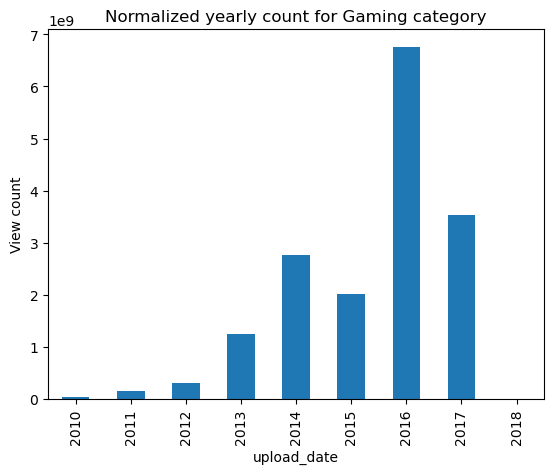

In [29]:
# Plot these normalized counts:
plot = views_normalized_gaming.plot(kind='bar', title = 'Normalized yearly count for Gaming category')
plot.set_ylabel('View count')

Text(0, 0.5, 'View count')

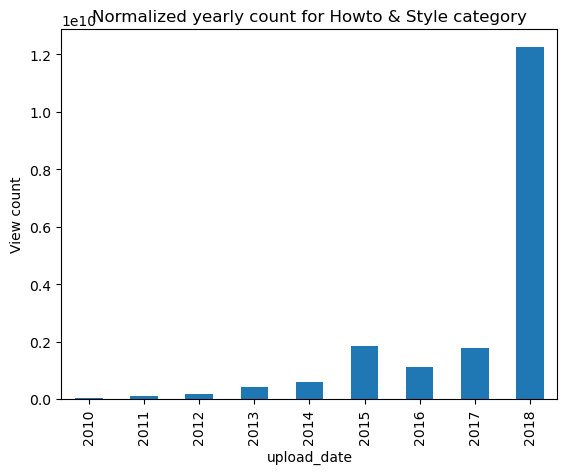

In [30]:
plot = views_normalized_howto.plot(kind='bar', title = 'Normalized yearly count for Howto & Style category')
plot.set_ylabel('View count')

2. Your friend's channel will be brand new, so you decide to look more closely at newer channels. For this question and all the following questions in A2, only consider channels that uploaded their first video in  2016 or later. Compute the total number of views in each category and divide it by the number of channels in that category.


In [33]:
# First, we select new videos and categories: channels uploading their first video in 2016 or later = does not count channels that posted in 2016 but also posted earlier...
channel_starts = youtube[['channel', 'upload_date']].groupby('channel').min().reset_index()
channels_late = channel_starts.loc[channel_starts.upload_date.dt.year >= 2016].channel.values

new_videos_gaming = youtube.loc[(youtube.channel.apply(lambda x: x in channels_late)) & (youtube.channel_cat == 'Gaming')]
new_videos_howto = youtube.loc[(youtube.channel.apply(lambda x: x in channels_late)) & (youtube.channel_cat == 'Howto & Style')]

# Then, we compute the total number of views per category:
total_views_gaming = new_videos_gaming['view_count'].sum()
total_views_howto = new_videos_howto['view_count'].sum()
# Then, we compute the total number of channels per category:
total_channels_gaming = new_videos_gaming['channel'].nunique()
total_channels_howto = new_videos_howto['channel'].nunique()
# Normalizing for each category:
normalized_gaming_new = total_views_gaming/total_channels_gaming
normalized_howto_new = total_views_howto/total_channels_howto

In [34]:
print("The total number of views in the Gaming category normalized by its number of channels is:", round(normalized_gaming_new,2))
print("The total number of views in the Howto & Style category normalized by its number of channels is:", round(normalized_howto_new,2))

The total number of views in the Gaming category normalized by its number of channels is: 895409422.38
The total number of views in the Howto & Style category normalized by its number of channels is: 1374135339.0


3. The number of views might be very unevenly over the different channels, and channels might upload different numbers of videos.
  1. Compute the mean number of views per video for each channel.
  2. Compute the mean of these means for each of the two categories. Print these values.
  3. Using bootstrapping, compute 95% confidence intervals for these two means. From this analysis, can you draw a recommendation for one of the two categories? Why, or why not?

In [35]:
# 4. Mean number of views per video for each channel:
mean_views_video_gaming = pd.DataFrame(new_videos_gaming.groupby('channel')['view_count'].mean())
mean_views_video_gaming

,view_count
channel,
Ceeday,2.596953e+06
Chris Smoove,3.569548e+05
Clash Royale,2.037094e+06
Daequan Loco,1.136136e+06
Denis,2.074953e+06
Frost Diamond,1.204915e+06
GameGrumps,6.767778e+05
Jess No Limit,1.154385e+06


In [36]:
mean_views_video_howto = pd.DataFrame(new_videos_howto.groupby('channel')['view_count'].mean())
mean_views_video_howto

,view_count
channel,
5-Minute Crafts,4.001437e+06
5-Minute Crafts GIRLY,1.810882e+06
5-Minute Crafts PLAY,1.879931e+06
Anaysa,3.424131e+06
Antonio Garza,3.983921e+06
BRICO SYMPA,2.964726e+05
BRIGHT SIDE,3.602201e+06
Blossom,1.143963e+07
Crafty Panda,1.509486e+07


In [37]:
# Mean of these means for both categories:
print("The mean of mean view_count per channel in the Gaming category is:", round(mean_views_video_gaming.mean()[0],2))
print("The mean of mean view_count per channel in the Howto & Style category is:", round(mean_views_video_howto.mean()[0],2))

The mean of mean view_count per channel in the Gaming category is: 1404771.14
The mean of mean view_count per channel in the Howto & Style category is: 3371299.22


In [38]:
# Input: your array and the number of random samples (e.g., 1000 is a good number)
# Output: [lower error, upper error]

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [39]:
# 3. Using bootstrapping, compute 95% confidence intervals for these two means:
ci95_gaming_low, ci95_gaming_up = bootstrap_CI(mean_views_video_gaming, 1000)
print("95% CI for mean of mean view count for each channel for Gaming category: [", ci95_gaming_low, ci95_gaming_up, "]")
ci95_howto_low, ci95_howto_up = bootstrap_CI(mean_views_video_howto, 1000)
print("95% CI for mean of mean view count for each channel for Howto & Style category: [", ci95_howto_low, ci95_howto_up, "]")

95% CI for mean of mean view count for each channel for Gaming category: [ 914268.2571022118 1895925.1503253095 ]
95% CI for mean of mean view count for each channel for Howto & Style category: [ 2151505.3489373163 5031237.791971862 ]


#### From this analysis, can you draw a recommendation for one of the two categories? Why, or why not?
From these two confidence intervals, we can see that for the Gaming category, the mean view count for all channels is between 914 268 and 1 895 925 while for the Howto & Style it is between 2 151 505 and 5 031 237. We can draw a clear recommendation for the Howto & Style category because the 95% CI are not overlapping and thus we can say with statistical confidence that the Howto & Style is significantly attracting more viewers.

# Task B: View forecasting (Machine Learning)

Your friend wants to figure out how they can optimize their videos for getting the maximum number of views (without using shocking thumbnails and clickbait titles). In this task, you will build a machine learning (ML) model for predicting the success of a video.

## B1: Get those shovels out again

1. For the prediction model, use all rows of the dataset, but keep only the following columns: `view_count, channel, upload_date, duration, average_rating, height, width`.

In [318]:
data_selected = youtube[['view_count', 'channel', 'upload_date', 'duration', 'average_rating', 'height', 'width']]

In [319]:
data_selected

,view_count,channel,upload_date,duration,average_rating,height,width
0,2541550.0,PewDiePie,2013-03-04,1126.0,4.886102,720.0,1280.0
1,1727646.0,PewDiePie,2013-03-04,903.0,4.951531,720.0,1280.0
2,1402747.0,PewDiePie,2013-03-04,806.0,4.962706,720.0,1280.0
3,4348296.0,PewDiePie,2013-03-03,909.0,4.937665,720.0,1280.0
4,1410659.0,PewDiePie,2013-03-03,834.0,4.957545,720.0,1280.0
...,...,...,...,...,...,...,...
139502,284147.0,cutepolish,2010-02-23,201.0,4.608439,480.0,640.0
139503,136278.0,cutepolish,2010-02-22,180.0,4.638451,480.0,640.0
139504,228384.0,cutepolish,2010-02-21,277.0,4.836411,480.0,640.0
139505,247053.0,cutepolish,2010-02-20,174.0,4.855700,480.0,640.0


2. Extract the upload year and upload month from the `upload_date` column into the two columns `upload_year` and `upload_month`, and remove `upload_date`.

In [320]:
data_selected = data_selected.assign(upload_year = data_selected.upload_date.dt.year)
data_selected = data_selected.assign(upload_month = data_selected.upload_date.dt.month)
data_selected = data_selected.drop(columns ='upload_date')

In [321]:
data_selected

,view_count,channel,duration,average_rating,height,width,upload_year,upload_month
0,2541550.0,PewDiePie,1126.0,4.886102,720.0,1280.0,2013,3
1,1727646.0,PewDiePie,903.0,4.951531,720.0,1280.0,2013,3
2,1402747.0,PewDiePie,806.0,4.962706,720.0,1280.0,2013,3
3,4348296.0,PewDiePie,909.0,4.937665,720.0,1280.0,2013,3
4,1410659.0,PewDiePie,834.0,4.957545,720.0,1280.0,2013,3
...,...,...,...,...,...,...,...,...
139502,284147.0,cutepolish,201.0,4.608439,480.0,640.0,2010,2
139503,136278.0,cutepolish,180.0,4.638451,480.0,640.0,2010,2
139504,228384.0,cutepolish,277.0,4.836411,480.0,640.0,2010,2
139505,247053.0,cutepolish,174.0,4.855700,480.0,640.0,2010,2


3. The entry in the channel column for a video indicates on which channel the video was uploaded. Encode this column via one-hot encoding.

In [322]:
# Encode channel column via one-hot encoding:
X = pd.get_dummies(data_selected, columns = ['channel'], prefix='channel_')

4. Split the data into a train (70%) and a test set (30%) with the appropriate function from sklearn, using 42 as the random seed.

In [323]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size=0.3, random_state=42)
X_train = train.drop(columns=['view_count'])
y_train = train['view_count']
X_test = test.drop(columns=['view_count'])
y_test = test['view_count']

## B2: Who is the most viewed of them all?

1. Train a ridge regression model (i.e., an L2-regularized linear regression model) on the train set that predicts the view count from the other features. Find and use the optimal regularization parameter $\alpha$ from the set {0.001, 0.01, 0.1} via 3-fold cross validation.

In [325]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_absolute_error
clf = RidgeCV(alphas=[0.001, 0.01, 0.1], scoring = 'r2', cv=3).fit(X_train, y_train)

In [326]:
# Get the best alpha parameter:
print("Best alpha:", clf.alpha_)

Best alpha: 0.1


2. Report the mean absolute error that the model makes on the test set.

In [327]:
ridge = Ridge(alpha=0.1)
_ = ridge.fit(X_train, y_train)
preds = ridge.predict(X_test)
print("Training score:", ridge.score(X_train, y_train))
print("Testing score:", ridge.score(X_test, y_test))
print("MAE of Ridge Regression:", mean_absolute_error(y_test, preds), '\n')

Training score: 0.07739974979827347
Testing score: 0.1492857348769192
MAE of Ridge Regression: 1444649.5039951892 



## B3: Checking our ambitions

To improve performance, you want to make the task of the ML model easier and turn it into a classification task. Now it only has to predict whether a video has a high view count (defined as being larger than the median of the view counts in the training set) or a low view count (defined as being smaller or equal to the median of the view counts in the training set).

1. Train a logistic regression model for this classification task. Find and use the optimal regularization parameter C (as defined in scikit-learn's documentation) from the set {1, 10, 100} via 3-fold cross validation. Use the random seed 42. _Hint_: If you get a warning about the training algorithm failing to converge, increase the maximum number of training iterations.

In [328]:
median_training = y_train.median()

In [329]:
from sklearn.linear_model import LogisticRegressionCV
y_train_binary = (y_train > median_training).astype(int)
y_test_binary = (y_test > median_training).astype(int)

In [330]:
Cs = (1, 10, 100)
log_reg_cv = LogisticRegressionCV(Cs=Cs, cv=3, random_state=42, max_iter=200).fit(X_train, y_train_binary)

In [331]:
# Get the best C parameter:
print("Best C:", log_reg_cv.C_[0])

Best C: 1


2. Compute the accuracy of the logistic regression model on the test set.

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression(C=1, max_iter = 1000)
_ = log.fit(X_train, y_train_binary)
preds = log.predict(X_test)
print("Training score:", log.score(X_train, y_train_binary))
print("Testing score:", log.score(X_test, y_test_binary))
print("Accuracy:", accuracy_score(y_test, preds), '\n')

Training score: 0.7488684539291786
Testing score: 0.7480228418512412
Accuracy: 0.0 



## B4: ...something's not right.

You are satisfied with the model performance. In fact, you are a bit surprised at how good the model is given the relatively little amount of information about the videos. So you take a closer look at the features and realize that the (one-hot-encoded) channel feature does not make sense for the application that your friend has in mind.

1. Why does the channel feature not make sense?

Even though your friend knows who will upload their videos (your friend, of course), no video with the "new" channel is in the training set and thus the corresponding one-hot feature does not exist in the model. Thus they wouldn't be able to use the trained model for predictions on their own videos.

2. Train another logistic regression model with all the features from B3 except the one-hot-encoded channel. Use again 42 as the seed for the train test split and perform the same hyperparameter optimization as in B3. How does the model performance change?

In [297]:
new_data_selected = data_selected[['view_count', 'duration', 'average_rating', 'height', 'width', 'upload_year', 'upload_month']]
train, test = train_test_split(new_data_selected, test_size=0.3, random_state=42)
X_train = train.drop(columns=['view_count'])
y_train = train['view_count']
X_test = test.drop(columns=['view_count'])
y_test = test['view_count']

threshold = y_train.median()

y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [298]:
log_reg_cv.fit(X_train, y_train_binary)
opt_C = log_reg_cv.C_[0]
opt_C

100

In [299]:
log_reg_cv.score(X_test, y_test_binary)

0.6075311208276587

Without the channel, the accuracy drops by 15 percentage points, and is not that far from uniformly random prediction anymore.

## B5: "We kinda forgot about categories."

On second thought, there is actually one feature that you may use about the channel. Namely, the channel category. The reason this one makes sense might also help you answer B4.1.

1. Train and evaluate another logistic regression model (in the same way as in B4 regarding train/test split and hyperparameter) that additionally includes the one-hot-encoded channel category.

In [333]:
new_data_selected = data_selected[['view_count', 'duration', 'average_rating', 'height', 'width', 'upload_year', 'upload_month']]
new_data_selected = new_data_selected.assign(channel_cat = youtube['channel_cat'])
X = pd.get_dummies(new_data_selected, columns = ['channel_cat'])
train, test = train_test_split(X, test_size=0.3, random_state=42)
X_train = train.drop(columns=['view_count'])
y_train = train['view_count']
X_test = test.drop(columns=['view_count'])
y_test = test['view_count']

threshold = y_train.median()

y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [334]:
log_reg_cv.fit(X_train, y_train_binary)
opt_C = log_reg_cv.C_[0]
opt_C

1

In [335]:
log_reg_cv.score(X_test, y_test_binary)

0.6168016629632285

2. The dynamics of the two categories might differ a lot, and the two communities might value different properties of a video differently. For instance, for one community, a long duration might be more important, for the other one, a large picture width. Thus, having only a single weight for, e.g., the duration of a video, might not give the best results. Is there something smarter that you can do than simply including the category as a single one-hot-encoded feature to improve the classification performance? Implement your idea and compare the accuracy on the test set with that of the first model (from task B5.1).

In [ ]:
# Separate both models

# Task C: A map of the channels (Graphs)

Your friend wants to map out the channels and represent their similarities. For this purpose, we have created two undirected and unweighted graphs for you, where in each graph, each channel has a node and similar channels have edges connecting them. In one graph, the similarity between two channels is based on how similar their video descriptions are, while in the other, the similarity is based on how similar their video tags are. We will call the former $G_{text}$ and the latter $G_{tags}$. You will be analyzing the two graphs loaded by running the cell below.

In [336]:
from networkx import from_numpy_array
import json
g_text_adj = np.loadtxt(open('data/g_text_adj.csv', 'r'), delimiter=',', skiprows=0) # similar video descriptions
g_tags_adj = np.loadtxt(open('data/g_tags_adj.csv', 'r'), delimiter=',', skiprows=0) # similar tags
channel_to_index = json.load(open('data/channel_indices.json', 'r'))
g_text = from_numpy_array(g_text_adj)
g_tags = from_numpy_array(g_tags_adj)

## C1: Does YouTube have a content diversity problem?

1. For each graph, calculate its diameter (i.e., the largest shortest-path length, where the maximization is done over all node pairs). What difference do you see? _Hint_: Don't worry if you get an error, just read the error message carefully.

In [338]:
import networkx as nx

In [339]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(nx.info(G))
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [342]:
print("Infos graph Gtext:", describe_graph(g_text), '\n')
print("Infos graph Gtags:", describe_graph(g_tags), '\n')

C:\Users\camil\AppData\Local\Temp\ipykernel_10560\4192365812.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 195 nodes and 18056 edges
Avg. Shortest Path Length: 1.0557
Diameter: 2.0000
Sparsity: 0.9546
Global clustering coefficient aka Transitivity: 0.9668
Infos graph Gtext: None 

Graph with 195 nodes and 18056 edges
Graph is not connected
Diameter and Avg shortest path length are not defined!
Sparsity: 0.9546
Global clustering coefficient aka Transitivity: 0.9692
Infos graph Gtags: None 



The second graph is not connected and thus does not have a defined diameter.

2. What does the diameter of $G_{text}$ say about the diversity of the channels’ contents? How about the diameter of $G_{tags}$?

The largest shortest-path length is only 2 so the channels' content is not very diversified. The diameter of Gtags is not defined as the graph is not connected so the tags are rather diverse.

3. Based on what you have calculated, which one has greater diversity: descriptions used by channels, or tags used by channels? Justify your answer.

Tags because graph not connected.

4. Imagine that you want to **compare** content diversity between two sets of channels (i.e., you want to see which set of channels has more diverse content), and you have calculated a tag-based graph for each set. Do you think the diameter is a good measure for doing the comparison? Justify your answer.

No, because as we saw, the diameter can end up being undefined for both, which implies that both are diverse but does not provide much of a comparison.

5. Back to our own two graphs. Based on $G_{text}$, for each category of channels, which channel is the one most representative of the contents of all channels in that category? In other words, for each category, if you needed to provide a summary of all channels in the category via one channel, which channel would you choose? Show us (us being the exam designers and your friend) the descriptions of this channel’s two most-viewed videos. What metric did you use for this purpose? Explain your choice.

In [364]:
# Get max element in the degree matrix:
max_deg = max(g_text.degree, key=lambda x: x[1])

In [365]:
g_text.degree

DegreeView({0: 192, 1: 196, 2: 195, 3: 157, 4: 184, 5: 192, 6: 193, 7: 188, 8: 114, 9: 180, 10: 194, 11: 192, 12: 179, 13: 160, 14: 186, 15: 194, 16: 194, 17: 192, 18: 194, 19: 191, 20: 181, 21: 190, 22: 191, 23: 184, 24: 190, 25: 192, 26: 192, 27: 192, 28: 178, 29: 187, 30: 189, 31: 195, 32: 195, 33: 195, 34: 193, 35: 85, 36: 189, 37: 191, 38: 169, 39: 183, 40: 192, 41: 176, 42: 194, 43: 194, 44: 194, 45: 188, 46: 189, 47: 187, 48: 183, 49: 138, 50: 190, 51: 196, 52: 176, 53: 187, 54: 195, 55: 195, 56: 196, 57: 189, 58: 149, 59: 191, 60: 190, 61: 190, 62: 191, 63: 194, 64: 194, 65: 193, 66: 171, 67: 196, 68: 193, 69: 184, 70: 195, 71: 195, 72: 193, 73: 194, 74: 195, 75: 191, 76: 190, 77: 192, 78: 191, 79: 186, 80: 192, 81: 193, 82: 196, 83: 195, 84: 194, 85: 193, 86: 164, 87: 193, 88: 185, 89: 190, 90: 194, 91: 185, 92: 191, 93: 194, 94: 160, 95: 188, 96: 193, 97: 178, 98: 191, 99: 187, 100: 195, 101: 188, 102: 181, 103: 184, 104: 196, 105: 193, 106: 178, 107: 191, 108: 191, 109: 191,

In [368]:
# Get name corresponding to max_deg from dict "channel_to_index":
for key, value in channel_to_index.items():
    if value == max_deg[0]:
        print("Channel with most connections:", key)

Channel with most connections: Desi Perkins


In [369]:
youtube.loc[youtube.channel == 'Desi Perkins'].sort_values('view_count', ascending=False).head(2)

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
137477,Desi Perkins,2014-05-04,EYEBROW TUTORIAL,"['how to', 'makeup', 'tutorial']",528.0,16851339.0,4.922917,1080.0,1920.0,Howto & Style
137267,Desi Perkins,2017-08-16,KIM KARDASHIAN WEST MAKEUP TUTORIAL + NEW KKW ...,[],1499.0,8925152.0,4.888759,1080.0,1920.0,Howto & Style


The most representative channel in terms of contents can be defined as the node having the maximum degree value: Here, Desi Perkins.

## C2: Going back to categories again

1. We want to use the two graphs to cluster channels from the same category together, and we want to compare their effectiveness at doing so. Use Kernighan-Lin bisection in the networkx package (`networkx.algorithms.community.kernighan_lin_bisection`) to divide each graph into two communities. Use 42 as the random seed. For each graph, show how many members of each category fall into each of the two communities.

In [380]:
from networkx.algorithms.community import kernighan_lin_bisection as klin
pair1_txt, pair2_txt = klin(g_text, seed = 42)
pair1_tags, pair2_tags = klin(g_tags, seed = 42)

In [388]:
# Get name corresponding to indices from dict "channel_to_index":
Names_comm1_txt = []
Names_comm2_txt = []
Names_comm1_tags = []
Names_comm2_tags = []
for key, value in channel_to_index.items():
    if value in pair1_txt:
        Names_comm1_txt.append(key)
    elif value in pair2_txt:
        Names_comm2_txt.append(key)
    if value in pair1_tags:
        Names_comm1_tags.append(key)
    elif value in pair2_tags:
        Names_comm2_tags.append(key)

In [414]:
for x in Names_comm1_txt:
    if youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Gaming':
        print("Gaming: ", x, '\n')
    elif youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Howto & Style': 
        print("Howto & Style: ", x, '\n')

Howto & Style:  Desi Perkins 

Gaming:  SSundee 

Howto & Style:  BRICO SYMPA 

Gaming:  Fe4RLess 

Howto & Style:  YourHealth 

Howto & Style:  alpha m. 

Gaming:  Aphmau 

Gaming:  Miniminter 

Howto & Style:  FitnessBlender 

Howto & Style:  SixPackAbs.com 

Gaming:  FGTeeV 

Gaming:  Clash of Clans 

Gaming:  MoreAliA 

Howto & Style:  Carli Bybel 

Gaming:  UnspeakableGaming 

Gaming:  aLexBY11 

Gaming:  Sernandoe 

Howto & Style:  Xyz Gyan 

Gaming:  PlayStation 

Gaming:  gameranx 

Gaming:  Prestige Clips 

Gaming:  Mini Ladd 

Gaming:  Rockstar Games 

Gaming:  DeGoBooM 

Howto & Style:  Creative Channel 

Gaming:  ExplodingTNT 

Howto & Style:  Tasty 

Gaming:  Lachlan 

Gaming:  Bajan Canadian 

Gaming:  videogamedunkey 

Howto & Style:  Pipe Cleaner Crafts B 

Gaming:  SeaNanners Gaming Channel 

Howto & Style:  Shruti Arjun Anand 

Howto & Style:  Mr. Kate 

Gaming:  Clash Royale 

Howto & Style:  Ingrid Nilsen 

Gaming:  Azerrz 

Gaming:  Mumbo Jumbo 

Howto & Style:  Te

In [397]:
num_comm_1_gaming_txt = []
num_comm_1_howto_txt = []
num_comm_2_gaming_txt = []
num_comm_2_howto_txt = []
num_comm_1_gaming_tags = []
num_comm_1_howto_tags = []
num_comm_2_gaming_tags = []
num_comm_2_howto_tags = []

for x in Names_comm1_txt:
    if youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Gaming': 
        num_comm_1_gaming_txt.append(x) 
    elif youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Howto & Style': 
        num_comm_1_howto_txt.append(x)
for x in Names_comm2_txt:
    if youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Gaming':
        num_comm_2_gaming_txt.append(x) 
    elif youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Howto & Style': 
        num_comm_2_howto_txt.append(x)
for x in Names_comm1_tags:
    if youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Gaming':
        num_comm_1_gaming_tags.append(x) 
    elif youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Howto & Style': 
        num_comm_1_howto_tags.append(x)
for x in Names_comm2_tags:
    if youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Gaming':
        num_comm_2_gaming_tags.append(x) 
    elif youtube.loc[youtube.channel == x]['channel_cat'].unique() == 'Howto & Style': 
        num_comm_2_howto_tags.append(x)


In [416]:
# For Gtext:
print("Gtext Gaming:", len(num_comm_1_gaming_txt), len(num_comm_2_gaming_txt), "Gtext Howto: ", len(num_comm_1_howto_txt), len(num_comm_2_howto_txt))
# For Gtags:
print("Gtags Gaming:", len(num_comm_1_gaming_tags), len(num_comm_1_howto_tags), "Gtags Howto: ", len(num_comm_2_gaming_tags), len(num_comm_2_howto_tags))

Gtext Gaming: 53 46 Gtext Howto:  44 52
Gtags Gaming: 81 16 Gtags Howto:  18 80


2. If one of these graphs were ideal for this clustering task, what would the resulting communities look like? If it were the absolute worst possible graph for the task, what would the resulting communities look like?

The ideal communities would be such that each would contain only **one** category. The worst communities would be evenly split between the two categories (i.e. 50% gaming and 50% howto).

3. Calculate the probability $P(community|category)$ for each community and category within each graph. Design a metric, using the four $P(community|category)$ values in a graph, whose value would be 1 for the ideal graph and 0 for the worst graph. Calculate this metric for both graphs and compare the two. What do the results say about how representative tags and descriptions are regarding the channel categories? Are tags better suited, or descriptions?

In [399]:
pcomm1_txt_gaming = len(num_comm_1_gaming_txt) / len(Names_comm1_txt)
pcomm2_txt_gaming = len(num_comm_2_gaming_txt) / len(Names_comm2_txt)
pcomm1_tags_gaming = len(num_comm_1_gaming_tags) / len(Names_comm1_tags)
pcomm2_tags_gaming = len(num_comm_2_gaming_tags) / len(Names_comm2_tags)
pcomm1_txt_howto = len(num_comm_1_howto_txt) / len(Names_comm1_txt)
pcomm2_txt_howto = len(num_comm_2_howto_txt) / len(Names_comm2_txt)
pcomm1_tags_howto = len(num_comm_1_howto_tags) / len(Names_comm1_tags)
pcomm2_tags_howto = len(num_comm_2_howto_tags) / len(Names_comm2_tags)

In [417]:
# For Gtext:
print("Gtext Gaming:", pcomm1_txt_gaming, pcomm2_txt_gaming, "Gtext Howto: ", pcomm1_txt_howto, pcomm2_txt_howto)
# For Gtags:
print("Gtags Gaming:", pcomm1_tags_gaming, pcomm2_tags_gaming, "Gtags Howto: ", pcomm1_tags_howto, pcomm2_tags_howto)

Gtext Gaming: 0.5463917525773195 0.46938775510204084 Gtext Howto:  0.4536082474226804 0.5306122448979592
Gtags Gaming: 0.8350515463917526 0.1836734693877551 Gtags Howto:  0.16494845360824742 0.8163265306122449


As we can see, the Gtext possesses more balanced probabilities between both communities while Gtags is able to capture more this distinction between communities and categories.

In [404]:
cats_df = youtube.loc[(youtube.channel_cat == 'Gaming') | (youtube.channel_cat == 'Howto & Style'), 
                   ['channel', 'channel_cat']].drop_duplicates(subset='channel')
cats_dict = {channel_to_index[cats_df.channel.values[i]]: cats_df.channel_cat.values[i] 
             for i in range(cats_df.shape[0])}
cats_dict = {k:1 if v == 'Gaming' else 0 for k,v in cats_dict.items()} # just replaces 'Gaming' by 1 and 'Howto & Style' by 0

In [406]:
cats_df

,channel,channel_cat
0,PewDiePie,Gaming
999,Marshmello,Gaming
1369,VanossGaming,Gaming
2369,Markiplier,Gaming
3369,jacksepticeye,Gaming
...,...,...
136536,Creative Channel,Howto & Style
137150,Desi Perkins,Howto & Style
137508,Indian Health,Howto & Style
138000,POPSUGAR Fitness,Howto & Style


For the metric, one could be:
$$1 - 2*min_{community, category}\{P(community|category)\}$$

which would yield 1 if one of the probabilities is 0, and yield 0 if they are all 0.5.

For the two graphs we have, they can simply spot the minimum and calculate this metric, which would yield the following:

In [ ]:
#Gtext Gaming: 0.5463917525773195 0.46938775510204084 Gtext Howto: 0.4536082474226804 0.5306122448979592
#Gtags Gaming: 0.8350515463917526 0.1836734693877551 Gtags Howto: 0.16494845360824742 0.8163265306122449

In [418]:
# G_text
1 - 2*(0.4536082474226804)

0.09278350515463918

In [ ]:
# G_tags
1 - 2*.1458

Based on this, $G_{tags}$ is quite superior in its discrimination between the two categories.

4. The Kernighan-Lin bisection you used above performs a min-edge cut: It attempts to partition the nodes of the graph into two sets of almost-equal size by deleting as few edges as possible. It starts off by creating a random partition of the nodes of the graph into two sets A and B that are almost equal in size, and then iteratively and in a greedy fashion moves nodes between A and B to reduce the number of edges between A and B. Show at least one toy example of a graph where the initialization could also be the final result. (Hint: Think of how, as we explained, the bisection algorithm relies on a minimum edge cut with a random initialization; under what circumstances could the original A and B be the best partition given that graph?)

A case where the initialisation would also be the final result would be when we have a graph with two connected components, and where each community in the initialisation is one of the two connected components. Since this is a bipartition with no edge deletions, it essentially is a local minimum of the algorithm and is also the final result.